In [15]:
from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'Label: 0\n')

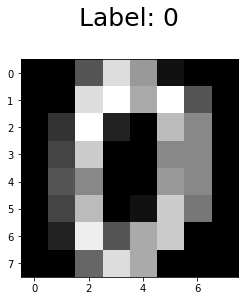

In [16]:
digits=load_digits()
plt.imshow(np.reshape(digits.data[0], (8, 8)), cmap='gray')
plt.title('Label: %i\n' % digits.target[0], fontsize=25)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=6)

In [18]:
x_train[0]

array([ 0.,  0.,  3., 14.,  7.,  0.,  0.,  0.,  0.,  0., 14., 16., 14.,
        9.,  0.,  0.,  0.,  4., 16., 16., 11., 15.,  3.,  0.,  0.,  5.,
       15.,  6.,  0.,  4.,  8.,  0.,  0.,  8.,  8.,  0.,  0.,  4.,  8.,
        0.,  0.,  5., 11.,  0.,  0.,  6.,  6.,  0.,  0.,  0., 13., 10.,
        5., 15.,  5.,  0.,  0.,  0.,  2., 12., 14.,  8.,  0.,  0.])

In [19]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=6)
#3 特征工程 标准化
transfer=StandardScaler()
x_train=transfer.fit_transform(x_train)
x_test=transfer.transform(x_test)
#1 KNN算法预估器
estimator=KNeighborsClassifier()
#加入网格搜索与交叉验证
#参数准备
param_predict={"n_neighbors":[3,5,7,9,11]}
estimator=GridSearchCV(estimator,param_grid=param_predict,cv=10)
estimator.fit(x_train,y_train)
# 模型评估
#方法1 直接对比真实值和预测值
y_predict=estimator.predict(x_test)
print("y_predict:\n",y_predict)
print("直接对比真实值和预测值:\n",y_test == y_predict)
#方法2 计算准确率
score=estimator.score(x_test,y_test)
print("accuracy sore:\n",score)
# 最佳参数：best_params_
print("最佳参数:\n",estimator.best_params_)
# 最佳结果：best_score_
print("最佳结果:\n",estimator.best_score_)
# 最佳估计器：best_estimator_
print("最佳估计器:\n",estimator.best_estimator_)
# 交叉验证结果：cv_results_
print("交叉验证结果:\n",estimator.cv_results_)
# recall score
recall_score=metrics.recall_score(y_test, y_predict, average='macro')
print("Recall:\n",recall_score)

y_predict:
 [1 9 6 0 8 5 7 8 4 2 7 6 2 6 0 7 4 3 1 3 7 2 2 2 0 6 2 6 5 0 0 2 7 3 5 6 6
 7 6 5 7 6 2 8 2 7 4 7 6 6 6 1 6 6 6 4 1 2 0 2 7 3 4 0 4 4 5 4 1 9 5 0 4 1
 0 0 5 8 3 0 0 2 8 0 3 1 4 0 8 2 9 5 1 1 5 8 4 5 4 6 0 4 9 1 1 4 7 1 6 7 5
 4 5 0 5 4 3 6 4 0 1 4 5 5 3 1 2 1 1 0 7 5 1 4 9 6 3 4 9 8 7 4 4 6 6 2 3 9
 3 7 3 5 3 8 5 1 2 1 1 8 8 2 6 9 0 5 3 3 5 7 7 1 4 8 3 0 4 7 6 5 0 1 2 7 9
 9 4 2 2 8 5 3 2 9 0 4 8 2 3 4 4 0 5 7 0 2 3 9 2 1 8 5 7 8 7 3 0 2 9 7 7 7
 0 0 2 4 2 4 8 7 0 6 2 0 2 2 9 2 5 7 5 6 0 5 6 5 3 0 9 6 2 5 2 4 3 7 4 1 9
 2 3 3 1 9 8 9 3 3 5 2 4 1 8 2 5 9 6 0 7 4 4 8 2 0 4 8 5 3 7 3 0 5 7 2 1 6
 5 8 1 3 1 0 8 3 6 4 6 4 1 5 0 9 7 7 4 8 3 8 3 6 3 7 6 4 5 1 9 1 5 9 0 1 1
 7 0 5 3 0 6 8 8 6 0 4 2 9 2 5 9 1 6 4 2 1 2 4 3 8 1 6 8 6 2 8 7 0 1 7 5 0
 8 3 4 3 2 3 3 0 7 4 0 6 2 5 3 8 1 3 5 0 0 4 5 7 8 9 9 6 5 5 0 4 2 0 6 8 8
 7 0 5 5 5 2 0 9 5 6 1 4 2 8 9 9 7 5 9 2 7 7 6 1 6 6 1 3 4 5 4 2 5 3 7 8 0
 3 5 7 4 8 0]
直接对比真实值和预测值:
 [ True  True  True  True  True  True  True  True  True  True

In [20]:
def KNN():
    x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=6)
    #knn
    #3 特征工程 标准化
    transfer=StandardScaler()
    x_train=transfer.fit_transform(x_train)
    x_test=transfer.transform(x_test)
    #1 KNN算法预估器
    estimator=KNeighborsClassifier(n_neighbors=5)
    estimator.fit(x_train,y_train)
    y_predict=estimator.predict(x_test)
    # 模型评估
    # accuracy score
    accuracy_score=metrics.accuracy_score(y_test, y_predict)
    print("KNN Accuracy: %0.3f"%accuracy_score,end='\t')
    # recall score
    recall_score=metrics.recall_score(y_test, y_predict, average='macro')
    print("Recall: %0.3f"%recall_score)
    # confusion matrix
    confusion_matrix=metrics.confusion_matrix(y_test, y_predict)
    return confusion_matrix

In [21]:
def DT():
    x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=6)
    #2 决策树预估器
    estimator=DecisionTreeClassifier(criterion="entropy")
    estimator.fit(x_train,y_train)
    y_predict=estimator.predict(x_test)
    # 模型评估
    # accuracy score
    accuracy_score=metrics.accuracy_score(y_test, y_predict)
    print("DT Accuracy: %0.3f"%accuracy_score,end='\t')
    # recall score
    recall_score=metrics.recall_score(y_test, y_predict, average='macro')
    print("Recall: %0.3f"%recall_score)

In [22]:
def SGD():
    x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=6)
    #3 SGD预估器
    estimator=SGDClassifier()
    estimator.fit(x_train,y_train)
    y_predict=estimator.predict(x_test)
    # 模型评估
    # accuracy score
    accuracy_score=metrics.accuracy_score(y_test, y_predict)
    print("SGD Accuracy: %0.3f"%accuracy_score,end='\t')
    # recall score
    recall_score=metrics.recall_score(y_test, y_predict, average='macro')
    print("Recall: %0.3f"%recall_score)

In [23]:
print('COMP9517 Week 5 Lab - z5140893')
print()
test_size=x_test.shape[0]/(x_train.shape[0]+x_test.shape[0])
print('Test size = %0.2f'%test_size)
confusion_matrix=KNN()
SGD()
DT()
print()
print('KNN Confusion Matrix:')
print(confusion_matrix)

COMP9517 Week 5 Lab - z5140893

Test size = 0.25
KNN Accuracy: 0.978	Recall: 0.975
SGD Accuracy: 0.960	Recall: 0.956
DT Accuracy: 0.853	Recall: 0.848

KNN Confusion Matrix:
[[52  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  0  0  0  0  0]
 [ 0  0 50  1  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  0  0  0]
 [ 0  0  0  0 49  0  0  2  0  0]
 [ 0  0  0  0  0 51  0  0  0  0]
 [ 0  0  0  0  0  0 45  0  0  0]
 [ 0  0  0  0  1  0  0 43  0  0]
 [ 0  0  0  1  0  0  0  0 38  0]
 [ 0  0  0  2  1  2  0  0  0 30]]
